# HYPOTHESIS TESTING
## Heart Disease Research Part II
In this project, you’ll investigate some data from a sample patients who were evaluated for heart disease at the Cleveland Clinic Foundation. The data was downloaded from the UCI Machine Learning Repository and then cleaned for analysis. 

In [1]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Inspect the Data
### One

The data has been saved as a dataframe named heart in script.py. It contains the following variables:

- age: age in years
- sex: sex assigned at birth; 'male' or 'female'
- trestbps: resting blood pressure in mm Hg
- chol: serum cholesterol in mg/dl
- cp: chest pain type ('typical angina', 'atypical angina', 'non-anginal pain', or 'asymptomatic')
- exang: whether the patient experiences exercise-induced angina (1: yes; 0: no)
- fbs: whether the patient’s fasting blood sugar is >120 mg/dl (1: yes; 0: no)
- thalach: maximum heart rate achieved in exercise test
- heart_disease: whether the patient is found to have heart disease ('presence': diagnosed with heart disease; 'absence': no heart disease)

Inspect the first few rows of data using the .head() method.

In [2]:
# Load & inspect dataset
heart = pd.read_csv('heart_disease.csv')
heart.head()

,age,sex,trestbps,chol,cp,exang,fbs,thalach,heart_disease
0,63.0,male,145.0,233.0,typical angina,0.0,1.0,150.0,absence
1,67.0,male,160.0,286.0,asymptomatic,1.0,0.0,108.0,presence
2,67.0,male,120.0,229.0,asymptomatic,1.0,0.0,129.0,presence
3,37.0,male,130.0,250.0,non-anginal pain,0.0,0.0,187.0,absence
4,41.0,female,130.0,204.0,atypical angina,0.0,0.0,172.0,absence


## Predictors of Heart Disease
### Two
Each of the patients in this dataset underwent an exercise test, during which their heart rate was monitored. For each patient, thalach gives us the highest heart rate that the patient achieved during this test.

Is thalach associated with whether or not a patient will ultimately be diagnosed with heart disease? Use sns.boxplot() to plot side by side box plots of thalach for patients who were and were not diagnosed with heart disease (indicated by the heart_disease variable). Do you think there is a relationship between these variables?

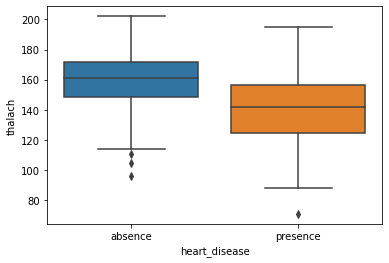

In [3]:
# The plot shows patients not diagnosed with heart disease achieved higher max heart rates 
sns.boxplot(heart.heart_disease, heart.thalach)
plt.show()

### Three

In order to investigate this question further, save the values for thalach among patients who were diagnosed with heart disease as a variable named thalach_hd. Then save the values of thalach among patients who were not diagnosed with heart disease as thalach_no_hd.

In [4]:
thalach_hd = heart.thalach[heart.heart_disease == 'presence']
thalach_no_hd = heart.thalach[heart.heart_disease == 'absence']

### Four
Calculate and print the difference in mean thalach for patients diagnosed with heart disease compared to patients without heart disease. Then do the same for the median difference.

In [5]:
# Mean difference
np.mean(thalach_hd) - np.mean(thalach_no_hd)

-19.11905597473242

In [6]:
# Median difference
np.median(thalach_hd) - np.median(thalach_no_hd)

-19.0

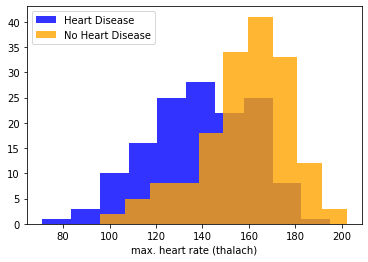

In [7]:
# Plot distributions for visual confirmation
plt.hist(thalach_hd, color= 'blue', label= 'Heart Disease', alpha= 0.8)
plt.hist(thalach_no_hd, color= 'orange', label= 'No Heart Disease', alpha= 0.8)
plt.xlabel('max. heart rate (thalach)')
plt.legend()
plt.show()

### Five
We’d like to find out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease.

Import the statistical test from scipy.stats that we would use to test the following null and alternative hypotheses:

- Null: The average thalach for a person with heart disease is equal to the average thalach for a person without heart disease.
- Alternative: The average thalach for a person with heart disease is NOT equal to the average thalach for a person without heart disease.

In [8]:
# A quantitative variable and a binary categorical variable call for a Two Sample T-test
from scipy.stats import ttest_ind

### Six
Run the hypothesis test from task 5 and print out the p-value. Using a significance threshold of 0.05, is there a significant difference in average thalach for people with heart disease compared to people with no heart disease?

In [9]:
# Yes, the low p-value shows there's a significant difference between the two groups
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
pval

3.456964908430172e-14

### Seven
Using the same process, investigate at least one other quantitative variable. Options include age, trestbps (resting blood pressure), and chol (cholesterol).

Are any of these variables also significantly associated with heart disease?

#### Answer: Of the three variables, `age` is most significantly associated with heart disease, followed by `trestbps` (blood pressure). `chol` (cholesterol) is not significantly associated with heart disease.

### Heart Disease and Age

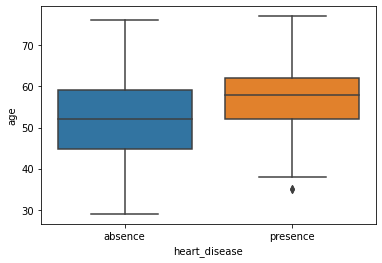

In [10]:
# Heart Disease and Age
sns.boxplot(heart.heart_disease, heart.age)
plt.show()

In [11]:
# Two-sample T-test for Heart Disease & Age: Significant
tstat, pval = ttest_ind(heart.age[heart.heart_disease == 'presence'], heart.age[heart.heart_disease == 'absence'])
pval

8.955636917529706e-05

### Heart Disease and Resting Blood Pressure (trestbps)

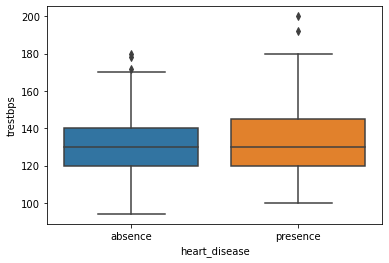

In [12]:
# Heart Disease and Resting Blood Pressure (trestbps)
sns.boxplot(heart.heart_disease, heart.trestbps)
plt.show()

In [13]:
# Two-sample T-test for Heart Disease & Blood Pressure: Significant
tstat, pval = ttest_ind(heart.trestbps[heart.heart_disease == 'presence'], heart.trestbps[heart.heart_disease == 'absence'])
pval

0.008548268928594928

### Heart Disease and Cholesterol (chol)

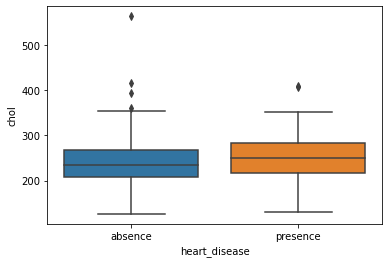

In [14]:
# Heart Disease and Cholesterol
sns.boxplot(heart.heart_disease, heart.chol)
plt.show()

In [15]:
# Two-sample T-test for Heart Disease & Cholesterol: NOT Significant
tstat, pval = ttest_ind(heart.chol[heart.heart_disease == 'presence'], heart.chol[heart.heart_disease == 'absence'])
pval

0.13914167020436527

## Chest Pain and Max Heart Rate
### Eight
Next, let’s investigate the relationship between thalach (maximum heart rate achieved during exercise) and the type of heart pain a person experiences. Create a set of side-by-side box plots of thalach for each chest pain type in the data.

Are there any chest pain types for which average thalach is significantly higher or lower (compared to other chest pain types)?

#### Answer: `asymptomatic` appears to be significantly lower than the other types of chest pain (cp).

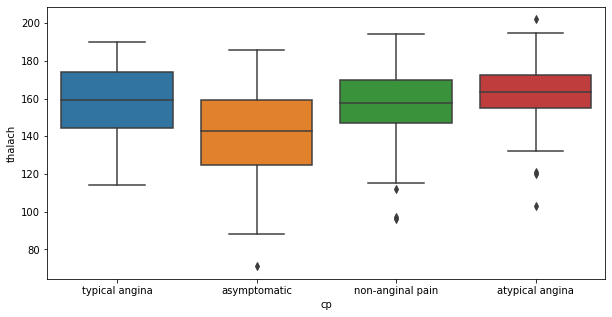

In [16]:
plt.figure(figsize= (10,5))
sns.boxplot(heart.cp, heart.thalach)
plt.show()

### Nine
To investigate this further, save the values of thalach for patients who experienced each type of chest pain as thalach_typical, thalach_asymptom, thalach_nonangin, and thalach_atypical, respectively.

In [17]:
thalach_typical = heart.thalach[heart.cp == 'typical angina']
thalach_asymptom = heart.thalach[heart.cp == 'asymptomatic']
thalach_nonangin = heart.thalach[heart.cp == 'non-anginal pain']
thalach_atypical = heart.thalach[heart.cp == 'atypical angina']

### Ten
Run a single hypothesis test to address the following null and alternative hypotheses:
- Null: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people all have the same average thalach.
- Alternative: People with typical angina, non-anginal pain, atypical angina, and asymptomatic people do not all have the same average thalach.

Save the resulting p-value as pval and print it out. Using a significance threshold of 0.05, is there at least one pair of chest pain categories for which people in those categories have significantly different thalach?

In [18]:
# Need to run one-way ANOVA due to single quantitative and non-binary categorical variables
from scipy.stats import f_oneway

In [19]:
# Yes, the resulting p-value shows there is at least one pair with significantly different thalach  
fstat, pval = f_oneway(thalach_typical, thalach_asymptom, thalach_nonangin, thalach_atypical)
pval

1.9065505247705008e-10

### Eleven
If you completed the previous step correctly, you should have concluded that there is at least one pair of chest pain types (cp) for which people with those pain types have significantly different average max heart rates during exercise (thalach).

Run another hypothesis test to determine which of those pairs are significantly different. Use an overall type I error rate of 0.05 for all six comparisons.

In [20]:
# Need to run Tukey's Range Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [21]:
tukey_results = pairwise_tukeyhsd(heart.thalach, heart.cp, 0.05)

In [22]:
print(tukey_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


#### Answer: As suspected, `asymptomatic` is significantly different from the other three types of chest pain.

## Heart Disease and Chest Pain
### Twelve
Finally, let’s investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease. Create a contingency table of cp and heart_disease and save it as Xtab, then print it out.

In [23]:
Xtab = pd.crosstab(heart.cp, heart.heart_disease)
Xtab

heart_disease,absence,presence
cp,,
asymptomatic,39,105
atypical angina,41,9
non-anginal pain,68,18
typical angina,16,7


### Thirteen
Run a hypothesis test for the following null and alternative hypotheses:

- Null: There is NOT an association between chest pain type and whether or not someone is diagnosed with heart disease.
- Alternative: There is an association between chest pain type and whether or not someone is diagnosed with heart disease.

Save the p-value as pval and print it out. Using a significance threshold of 0.05, is there a significant association between chest pain type and whether or not someone is diagnosed with heart disease?

In [24]:
# To investigate an association between two categorical variables, this task calls for a Chi-Square test
from scipy.stats import chi2_contingency

In [25]:
# Yes, given the p-value there is a significant association between chest pain type and heart disease diagnosis
chi2, pval, dof, expected = chi2_contingency(Xtab)
pval

1.2517106007837527e-17

## ** End of Project **